<a href="https://colab.research.google.com/github/alishatromp/Deep-Learning-assignments/blob/main/10092023_CNN_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
car_img_path = "/content/car.jpeg"

In [2]:
car_img_path

'/content/car.jpeg'

## Machine learning
- pandas
- numpy
- scikit learn
- seaborn/matplotlib

## Deep learning
- deep learning
- tensorflow
- pytorch
- keras

- openCV nltk gensim spacy

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 #opencv

In [4]:
car_img_path

'/content/car.jpeg'

In [5]:
img = cv2.imread(car_img_path) #image is in the form of pixel

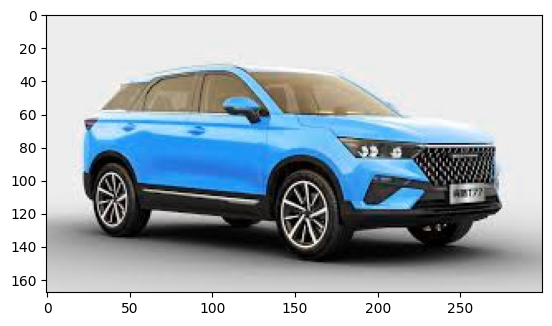

In [6]:
plt.imshow(img) #colour of the car is yellow, but below it is blue
#by default the sequence will become BGR instead of RGB.

In [7]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

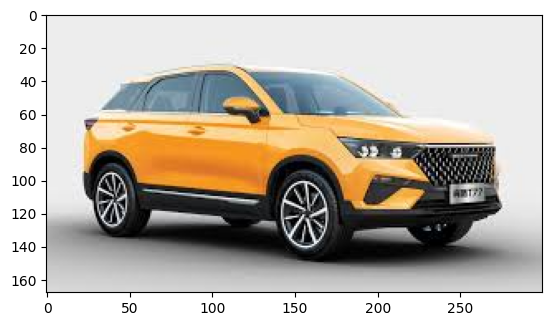

In [8]:
plt.imshow(img2)

In [9]:
img3=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

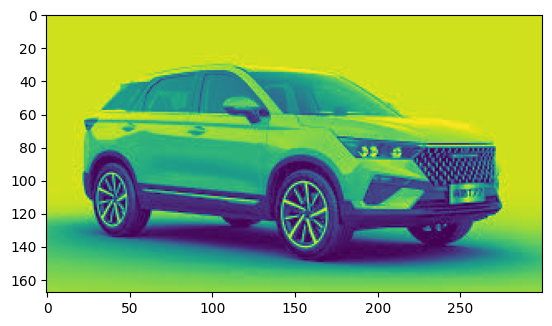

In [10]:
plt.imshow(img3)

In [11]:
img.shape #3 is the channel

(168, 300, 3)

In [12]:
img2.shape

(168, 300, 3)

In [13]:
img3.shape #2 channels with grayscale black and white

(168, 300)

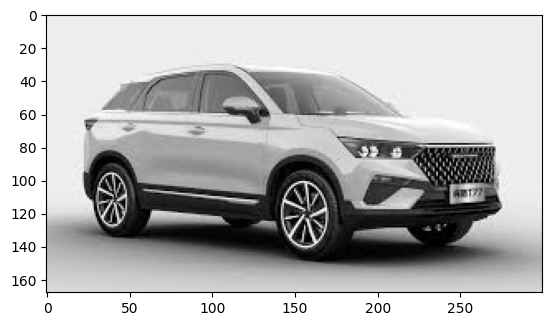

In [14]:
plt.imshow(img3,cmap='gray')

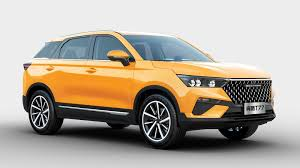

In [15]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [16]:
img3.shape

(168, 300)

In [17]:
row,col=img3.shape

In [18]:
car=img3.reshape(1,row,col,1)

In [19]:
car.shape

(1, 168, 300, 1)

In [20]:
Conv_layer = [tf.keras.layers.Conv2D(filters=1,
                       kernel_size =(3,3),
                       strides=(1,1),
                       input_shape = car.shape[1:]

                       )]

In [21]:
conv_model = tf.keras.Sequential(Conv_layer)

In [22]:
conv_model.summary() # trainable parameters is 20 because size of filter is 3x3 so 9 + 1 (bias) but 2 filters so 10 x 2 = 20

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#plt.imshow(car, cmap='gray')

In [24]:
output=conv_model.predict(car)

1/1 [==============================] - 7s 7s/step


In [25]:
output.shape

(1, 166, 298, 1)

In [26]:
row,col=output.shape[1:-1]

In [27]:
row, col

(166, 298)

In [28]:
output.shape

(1, 166, 298, 1)

In [29]:
reshaped_output=output.reshape(row,col)

# So the features it will extract will be the below:

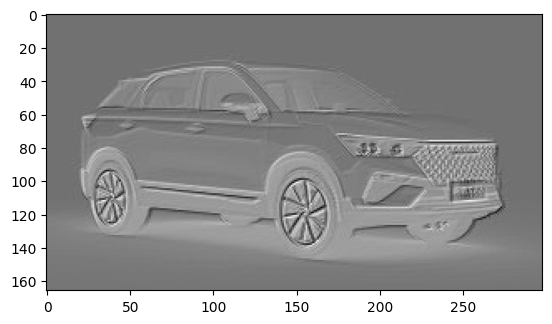

In [30]:
plt.imshow(reshaped_output, cmap='gray')

# More practicals

In [31]:
row, col, depth=img2.shape

In [32]:
colour_car = img2

In [33]:
reshaped_colour_img=colour_car.reshape(1,row,col,depth)

In [34]:
reshaped_colour_img.shape[1:]

(168, 300, 3)

In [35]:
CONV_LAYER=[tf.keras.layers.Conv2D(
    filters =1,
    kernel_size=(3,3),
    strides = (1,1),
    input_shape=reshaped_colour_img.shape[1:]

)]

In [36]:
conv_model=tf.keras.Sequential(CONV_LAYER)

In [37]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
colour_output=conv_model.predict(reshaped_colour_img)

1/1 [==============================] - 0s 80ms/step


In [39]:
row, col = colour_output.shape[1:-1]

In [40]:
reshaped_out = colour_output.reshape(row, col)

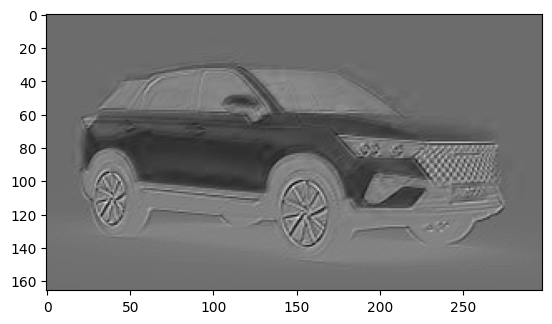

In [41]:
plt.imshow(reshaped_out, cmap='gray')

In [42]:
colour_car.shape

(168, 300, 3)

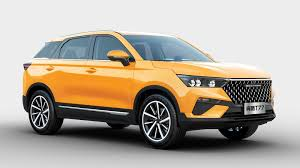

In [43]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [44]:
def reshaping_in(img,grayscale=True):
  if grayscale:
    row,col = img.shape
    img=img.reshape(1,row,col,1)
    return img
  row,col, depth = img.shape
  colour_img = img.reshape(1,row,col,depth)
  return colour_img

In [45]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img, grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [46]:
result = max_pooling(colour_car)

In [47]:
#Result is tensor
result.shape

TensorShape([1, 84, 150, 3])

In [48]:
def plot(result):
  _, row, col, _ = result.shape
  reshaped_img = tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)


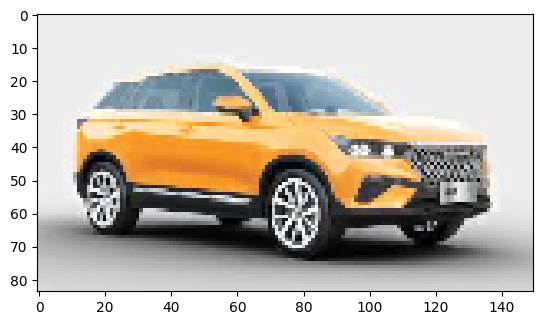

In [49]:
plot(result)

## check to see with min pooling, avg pooling and global pooling.

# do the reshaping

In [51]:
def reshaping_in(img, grayscale = True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1,row,col,1)#grayscale
    return img
  row,col,depth = img.shape
  colour_img = img.reshape(1,row,col,depth)
  return colour_img


# do the convolution

In [62]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding = 'valid'):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                       kernel_size=filter_size,
                                       strides = (1,1),
                                       input_shape = input_shape,
                                       padding = padding
                                     )]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [64]:
def apply_conv_model_and_visualizing(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row,col, depth = out.shape[1:]
    reshape_out = out.reshape(row,col,depth)

    for d in range (depth):
      plt.imshow(reshape_out[:,:,d], cmap='gray')
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 74ms/step
(1, 166, 298, 10)


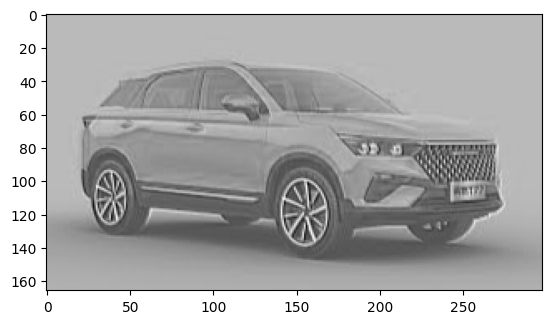

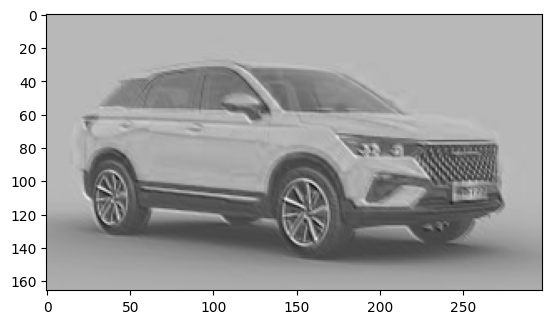

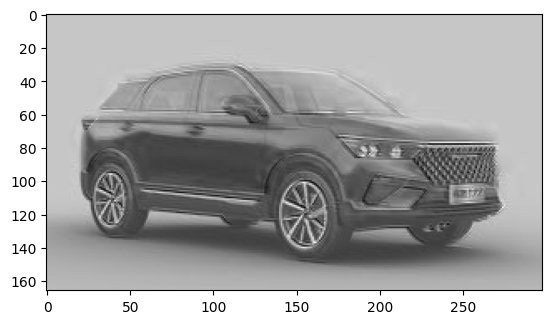

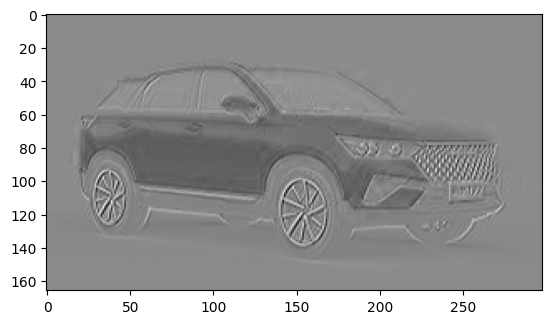

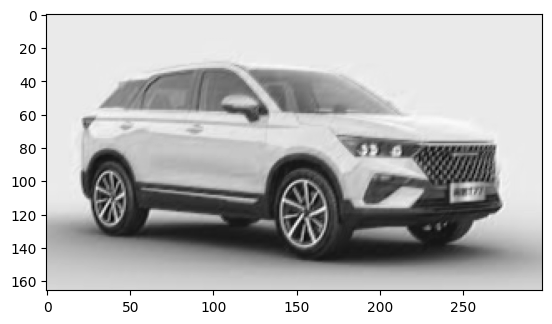

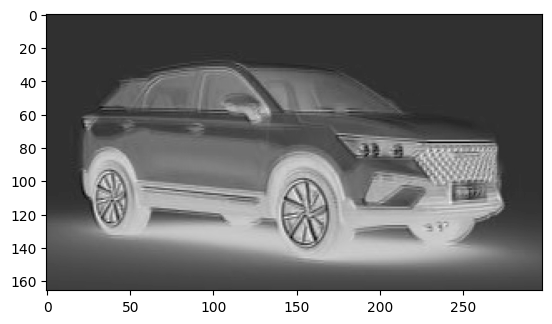

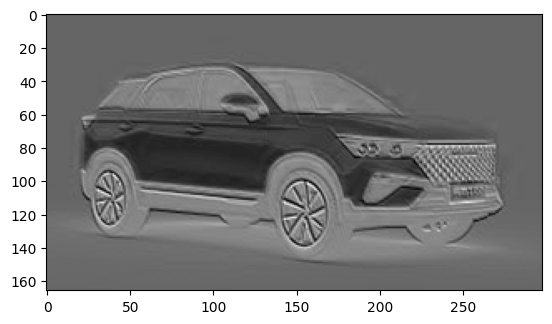

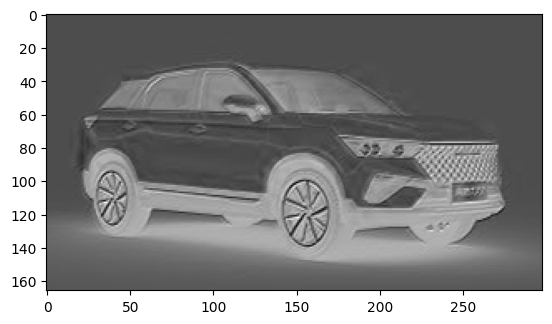

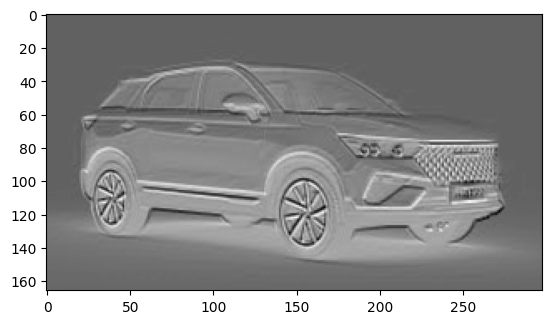

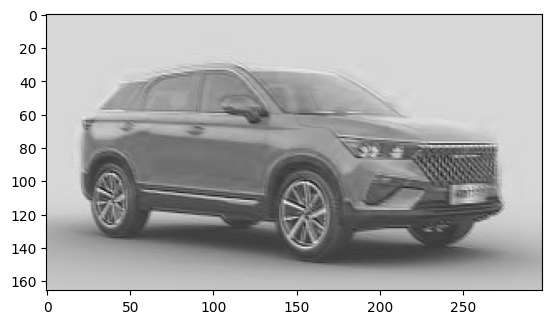

In [66]:
input_img = reshaping_in(colour_car, grayscale = False)
model = get_conv_model(filters=10, filter_size = (3,3), strides = (1,1), input_shape = input_img.shape[1:])
apply_conv_model_and_visualizing(input_img,model)

# how to download files from Kaggle directly.
1. go to kaggle.com and go to dataset.
2. Go to the settings from your profile and create new token.
3. Copy kaggle.json file and save it in your folder.
4. !mkdir -p ~/ . kaggle
5. !cp kaggle.json ~/.kaggle/
6. command 5 is for copying file into kaggle.
7. !chmod 600 /root/.kaggle/kaggle.json
8. Use command in line 7 to change mode.

In [54]:
!mkdir -p ~/ . kaggle

In [52]:
!kaggle datasets download -d tongpython/cat-and-dog

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [56]:
!cp kaggle.json ~/.kaggle/

In [57]:
!chmod 600 /root/.kaggle/kaggle.json

In [58]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:12<00:00, 20.1MB/s]
100% 218M/218M [00:12<00:00, 18.1MB/s]
